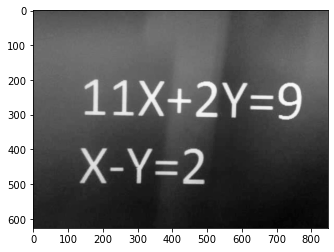

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Equation_Image.jpeg', 0)
plt.imshow(img, cmap='Greys')


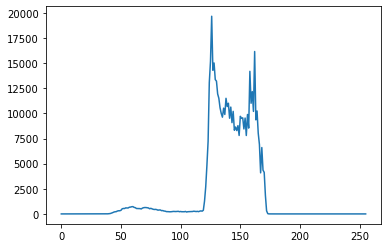

In [2]:
histg = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

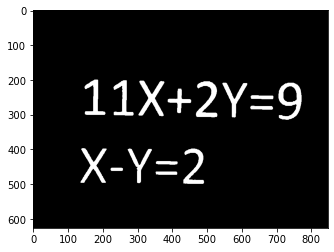

In [3]:
import numpy as np

length, width = (img.shape)
img_new = np.zeros((length, width), dtype='uint8')

for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 100:
            img_new[i][j] = 255
        else:
            img_new[i][j] = 0

plt.imshow(img_new, cmap='Greys')

17


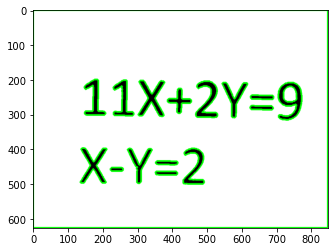

In [4]:
contours, hierarchy = cv.findContours(img_new,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
print(len(contours))                                              # printing the total number of contours
img_3d = cv.cvtColor(img_new,cv.COLOR_GRAY2RGB)
cv.drawContours(img_3d, contours, -1, (0,255,0), 3)               # Drawing all the contours
plt.imshow(img_3d, cmap = 'Greys')

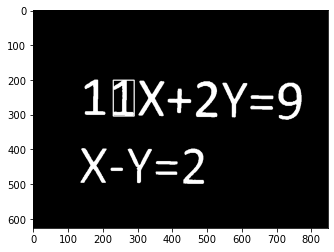

In [5]:
x,y,w,h = cv.boundingRect(contours[15])
im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)   #drawing the bounding rectangle for a random contour
plt.imshow(im, cmap = 'Greys')

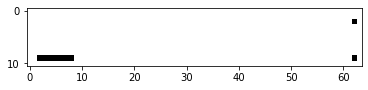

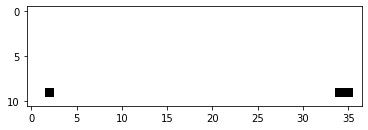

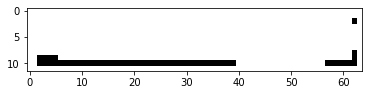

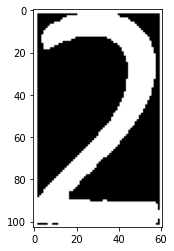

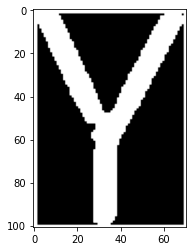

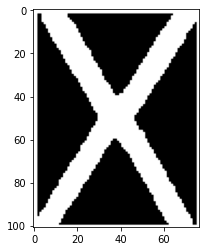

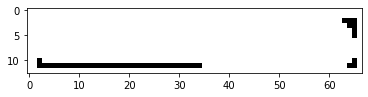

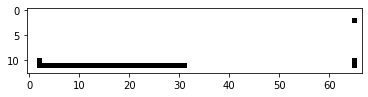

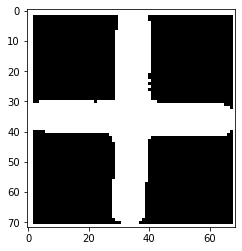

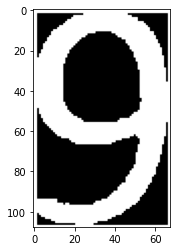

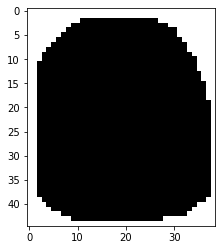

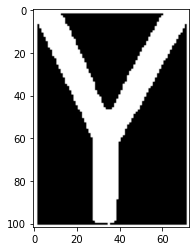

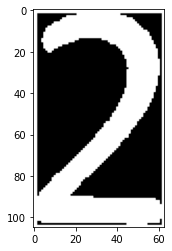

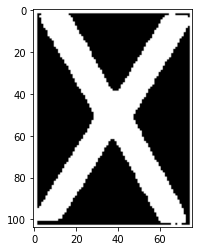

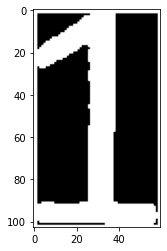

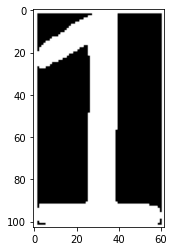

In [6]:
for i in range(1, 17):
    x,y,w,h = cv.boundingRect(contours[i])                   #printing all the images of the bouding rectanges
    im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(im[y:y+h,x:x+w], cmap = 'Greys')
    plt.show()


Clearly we can see that some images of the equal, and minus signs are not clear
so we skip them

so we skip the first 3, the 7th, 8th iteration


the 11th iteration is the inside loop of the number 9, which is again not needed

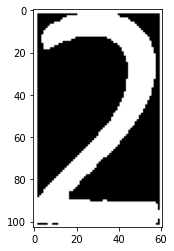

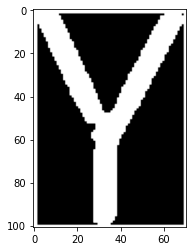

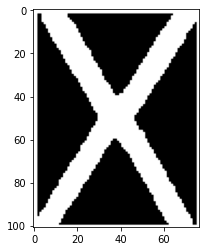

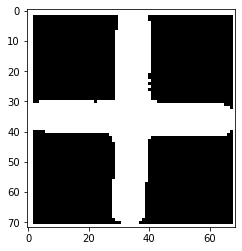

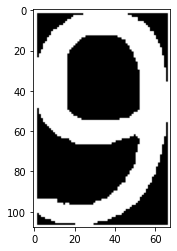

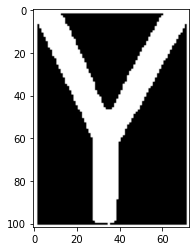

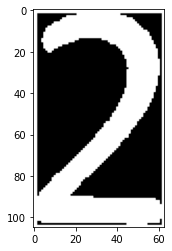

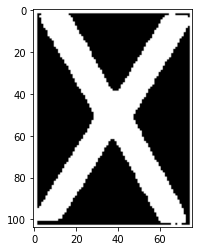

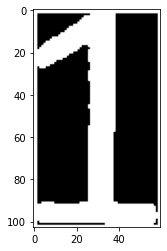

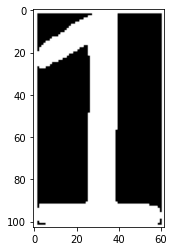

In [7]:
for i in range(4, 17):
    if (i == 7) or (i == 8) or (i == 11):
        continue
    x,y,w,h = cv.boundingRect(contours[i])                               # printing all the numbers and variables
    im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(im[y:y+h,x:x+w], cmap = 'Greys')
    plt.show()

We have separated all the numbers and variables from the equation